Boa Noite!

Nesse Codico hoje vou fazer um Modelo de factor Investing no Ibovespa em Python 

Irei fazer um backtesting dos ultimos 6 anos, escolhendo as 8 melhores acoes do indices como criterio nos ultimos 7 meses.



In [2]:
import yfinance as yf
import pandas as pd 

In [4]:
!pip install quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import quantstats as qs # Fazer um grafico

In [23]:
Historica = pd.read_excel('composicao_ibov.xlsx')
tickers = pd.read_excel('composicao_ibov.xlsx', sheet_name='lista_acoes')
Historica

,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
0,ABEV3,ABEV3,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,...,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3
1,AMER3,BBAS3,ABEV3,BBDC4,BBDC4,ABEV3,ABEV3,ABEV3,BBDC4,ABEV3,...,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,ITUB4,PETR4,ITUB4
2,AURE3,BBDC3,BBDC4,ABEV3,ABEV3,BBDC4,BBDC4,BBDC4,ABEV3,BBDC4,...,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,PETR4,ITUB4,PETR4
3,B3SA3,BBDC4,BRFS3,PETR4,PETR4,BRFS3,PETR4,PETR4,PETR4,PETR4,...,PETR3,BBDC4,BBDC4,BBDC4,BBDC4,PETR3,PETR3,BBDC4,BBDC4,BBDC4
4,B3SA3,BBSE3,CIEL3,BRFS3,PETR3,PETR4,BRFS3,BRFS3,BRFS3,BRFS3,...,BBDC4,B3SA3,PETR3,PETR3,PETR3,BBDC4,BBDC4,PETR3,PETR3,PETR3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,EZTC3,JHSF3,JHSF3,GOLL4,GOLL4,GOLL4,GOLL4,CVCB3,CVCB3,EZTC3
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,JHSF3,EZTC3,EZTC3,JHSF3,EZTC3,CASH3,CASH3,GOLL4,ECOR3,ECOR3
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CASH3,CASH3,CASH3,EZTC3,CASH3,POSI3,POSI3,ECOR3,GOLL4,CVCB3
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,POSI3,POSI3,POSI3,CASH3,POSI3,NaN,NaN,POSI3,POSI3,CASH3


In [24]:
tickers

,tickers
0,ENEV3.SA
1,SOMA3.SA
2,ELET6.SA
3,BIDI4.SA
4,RAIZ4.SA
...,...
102,VVAR11.SA
103,ABEV3.SA
104,BRPR3.SA
105,HYPE3.SA


In [54]:
dados_cotacao = yf.download(tickers= tickers['tickers'].tolist(),
                            start = "2015-05-29", end="2022-12-31")['Adj Close']
dados_cotacao

[*********************100%***********************]  107 of 107 completed

7 Failed downloads:
- BIDI11.SA: No timezone found, symbol may be delisted
- SULA11.SA: No timezone found, symbol may be delisted
- LCAM3.SA: No timezone found, symbol may be delisted
- BIDI4.SA: No timezone found, symbol may be delisted
- JPSA3.SA: No timezone found, symbol may be delisted
- HGTX3.SA: No timezone found, symbol may be delisted
- BRML3.SA: No timezone found, symbol may be delisted


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-29,14.236556,6.685466,23.799561,20.257240,NaN,NaN,NaN,2.771958,14.430489,8.534483,...,30.210823,4.333781,12.760986,16.042191,NaN,6.362684,22.250927,15.229004,5.741956,14.081803
2015-06-01,14.290336,6.698972,23.468353,20.240713,NaN,NaN,NaN,2.866007,14.519325,8.664779,...,30.509327,4.291293,12.754623,16.042191,NaN,6.362684,22.111132,15.308527,5.782249,13.637918
2015-06-02,14.328958,6.617936,23.657616,20.876854,NaN,NaN,NaN,2.925406,14.881047,8.833375,...,30.851727,4.384767,13.588386,17.238655,NaN,6.362684,21.784945,16.401997,5.926638,13.867513
2015-06-03,14.228539,6.658455,22.616678,20.653791,NaN,NaN,NaN,2.913031,14.341650,8.556320,...,30.553225,4.282795,13.295612,16.903645,NaN,6.362684,21.901436,16.451698,5.926638,13.523121
2015-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.451698,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,14.620000,14.800000,9.180000,80.849998,19.981815,15.05,11.45,13.165410,34.267910,12.759445,...,12.746346,6.920000,84.465065,NaN,15.75,2.560000,37.196148,NaN,38.228981,10.050000
2022-12-26,14.520000,14.680000,9.340000,78.559998,19.891987,14.78,11.36,13.234442,34.219345,12.463380,...,12.259920,6.960000,85.238083,NaN,15.24,2.550000,36.325726,NaN,37.921162,10.190000
2022-12-27,14.520000,14.450000,9.160000,76.570000,19.263187,14.72,10.74,12.770941,33.082909,12.539784,...,12.190430,7.020000,87.273392,NaN,15.05,2.370000,36.180649,NaN,37.742432,9.900000


In [33]:
dados_cotacao.index = pd.to_datetime(dados_cotacao.index)
dados_cotacao = dados_cotacao.sort_index()

dados_cotacao

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-29,14.236551,6.685467,23.799561,20.257240,NaN,NaN,NaN,2.771959,14.430487,8.534481,...,30.210817,4.333780,12.760986,16.042189,NaN,6.362683,22.250917,15.229004,5.741956,14.081800
2015-06-01,14.290337,6.698973,23.468353,20.240713,NaN,NaN,NaN,2.866006,14.519332,8.664777,...,30.509331,4.291293,12.754621,16.042189,NaN,6.362683,22.111124,15.308529,5.782251,13.637918
2015-06-02,14.328955,6.617937,23.657616,20.876852,NaN,NaN,NaN,2.925406,14.881042,8.833374,...,30.851736,4.384767,13.588384,17.238653,NaN,6.362683,21.784943,16.401995,5.926637,13.867514
2015-06-03,14.228537,6.658454,22.616678,20.653793,NaN,NaN,NaN,2.913030,14.341642,8.556311,...,30.553225,4.282795,13.295614,16.903645,NaN,6.362683,21.901432,16.451696,5.926637,13.523122
2015-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.451696,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,14.620000,14.800000,9.180000,80.849998,19.981815,15.05,11.45,13.165411,34.267910,12.759444,...,12.746346,6.920000,84.465065,NaN,15.75,2.560000,37.196148,NaN,38.228981,10.050000
2022-12-26,14.520000,14.680000,9.340000,78.559998,19.891987,14.78,11.36,13.234442,34.219345,12.463381,...,12.259920,6.960000,85.238083,NaN,15.24,2.550000,36.325718,NaN,37.921162,10.190000
2022-12-27,14.520000,14.450000,9.160000,76.570000,19.263187,14.72,10.74,12.770941,33.082912,12.539783,...,12.190430,7.020000,87.273392,NaN,15.05,2.370000,36.180649,NaN,37.742432,9.900000


In [42]:
# Calculando a m[edia do retorno dos ultimos 7 meses 

r7 = dados_cotacao.resample("M").last() # Usando sempre o fechamento de mes
r7M = dados_cotacao.resample("M").last().pct_change() #Calculando o retorno mensal de todas as acoes

r7H = dados_cotacao.resample("M").last().pct_change().head(20) # 
#r7M
r7R = (dados_cotacao.resample("M").last().pct_change().rolling(7).mean()
        .dropna(axis=0, how = "all").drop('2022-12-31')) # media de retornos nos ultimos 7 meses em porcentagem
r7R

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.001950,-0.029248,-0.065977,-0.017682,NaN,NaN,NaN,0.004278,-0.047123,-0.025609,...,-0.016049,-0.147154,-0.053107,-0.060219,NaN,-0.124164,-0.011703,-0.185254,-0.014471,-0.031506
2016-01-31,0.000195,-0.002171,-0.057474,-0.028699,NaN,NaN,NaN,-0.009982,-0.067365,-0.042596,...,-0.012267,-0.184219,-0.076857,-0.092112,NaN,-0.159640,-0.019134,-0.162126,-0.025967,-0.050952
2016-02-29,-0.010277,0.037138,-0.059721,-0.022236,NaN,NaN,NaN,0.023766,-0.057441,-0.014066,...,-0.012792,-0.169228,-0.042859,-0.057539,NaN,-0.060308,-0.011987,-0.060618,-0.044619,-0.008536
2016-03-31,0.001905,0.023046,-0.007280,0.018368,NaN,NaN,NaN,0.063214,0.036939,0.040653,...,0.016324,0.009749,-0.002857,-0.005600,NaN,-0.049514,0.021719,0.010680,-0.019768,-0.001055
2016-04-30,0.002799,0.066272,-0.005534,0.036802,NaN,NaN,NaN,0.076270,0.072912,0.053328,...,0.014022,0.046471,0.050635,0.057512,NaN,0.075383,0.034796,0.084867,0.002375,-0.014793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,-0.003146,-0.060367,-0.094451,0.011073,0.035023,NaN,-0.084621,0.013326,0.040819,0.006532,...,-0.009828,-0.066972,-0.005767,0.000000,-0.032003,-0.080970,-0.004796,0.000000,-0.014438,-0.053880
2022-08-31,0.004276,-0.038994,-0.070376,0.025646,0.062656,NaN,-0.055093,-0.022352,0.045491,-0.002959,...,-0.005972,-0.084394,-0.015005,0.000000,-0.027345,-0.017738,-0.020296,0.000000,-0.009613,-0.074785
2022-09-30,0.004607,-0.018176,-0.062861,0.035933,0.045528,NaN,-0.051255,-0.006518,0.024358,0.014543,...,-0.022141,-0.082029,-0.018461,0.000000,-0.037782,0.009078,-0.023345,0.000000,0.021418,-0.044394


In [48]:
carteiras = r7R.rank(axis=1,ascending= False) 
for data in carteiras.index:
    for empresa  in carteiras.columns:

        if carteiras.loc[data, empresa]<9:
            carteiras.loc[data, empresa] = 1

        else:
            carteiras.loc[data, empresa] = 0
            
carteiras

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
r7R.rank(axis=1,ascending= False)

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,18.0,NaN,49.0,NaN,NaN,NaN,NaN,12.0,43.0,28.0,...,22.0,56.0,46.0,48.0,NaN,NaN,19.0,NaN,NaN,35.0
2016-01-31,15.0,NaN,40.0,NaN,NaN,NaN,NaN,16.0,43.0,35.0,...,17.0,54.0,44.0,49.0,NaN,NaN,21.0,NaN,23.0,37.0
2016-02-29,21.0,NaN,50.0,NaN,NaN,NaN,NaN,9.0,45.0,25.0,...,24.0,56.0,39.0,46.0,NaN,NaN,22.0,NaN,40.0,20.0
2016-03-31,37.0,NaN,46.0,NaN,NaN,NaN,NaN,7.0,18.0,13.0,...,29.0,34.0,41.0,44.0,NaN,NaN,25.0,NaN,51.0,39.0
2016-04-30,42.0,NaN,45.0,NaN,NaN,NaN,NaN,10.0,13.0,21.0,...,39.0,25.0,24.0,17.0,NaN,NaN,33.0,NaN,44.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,44.0,75.0,85.0,NaN,14.0,NaN,82.0,31.0,9.0,35.0,...,50.0,77.0,48.0,NaN,62.0,81.0,46.0,NaN,51.0,67.0
2022-08-31,37.0,69.0,82.0,NaN,6.0,NaN,75.0,60.0,11.0,41.0,...,45.0,88.0,53.0,NaN,63.0,56.0,58.0,NaN,49.0,86.0
2022-09-30,47.0,58.0,79.0,12.0,8.0,NaN,76.0,53.0,19.0,32.0,...,61.0,88.0,59.0,NaN,68.0,41.0,63.0,NaN,23.0,71.0


In [58]:
r7M = dados_cotacao.resample("M").last().pct_change() #Calculando o retorno mensal de todas as acoes


r7M = r7M.drop(r7M.index[:8],axis = 0)
carteiras.index = r7M.index
carteiras

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# Chegando na rentabilidade da carteira
retorno_modelo = (carteiras * r7M).sum(axis = 1)/8 # A soma de tudo dividido pelos ativos na carteira
retorno_modelo


Date
2016-01-31   -0.069522
2016-02-29    0.060109
2016-03-31    0.074721
2016-04-30    0.186030
2016-05-31   -0.182579
                ...   
2022-08-31    0.097156
2022-09-30   -0.055039
2022-10-31    0.083444
2022-11-30   -0.083596
2022-12-31   -0.011460
Freq: M, Length: 84, dtype: float64

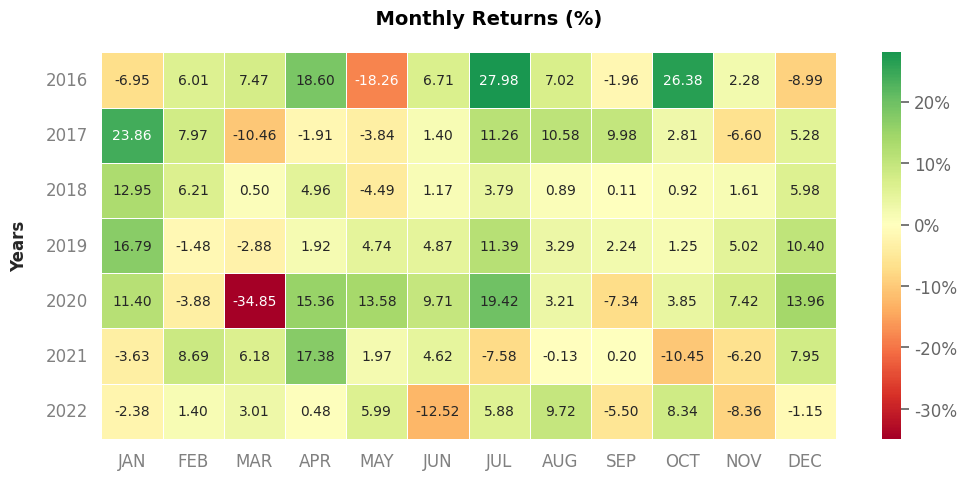

In [66]:
qs.extend_pandas()

retorno_modelo.plot_monthly_heatmap()   

In [70]:
ibovespa = yf.download("^BVSP", start = "2015-12-30", end = "2022-12-31")['Adj Close']

retornos_ibovespa = ibovespa.resample("M").last().pct_change().dropna()

retornos_ibovespa

[*********************100%***********************]  1 of 1 completed


Date
2016-01-31   -0.067912
2016-02-29    0.059100
2016-03-31    0.169673
2016-04-30    0.077035
2016-05-31   -0.100889
                ...   
2022-08-31    0.061629
2022-09-30    0.004693
2022-10-31    0.054527
2022-11-30   -0.030602
2022-12-31   -0.021825
Freq: M, Name: Adj Close, Length: 84, dtype: float64

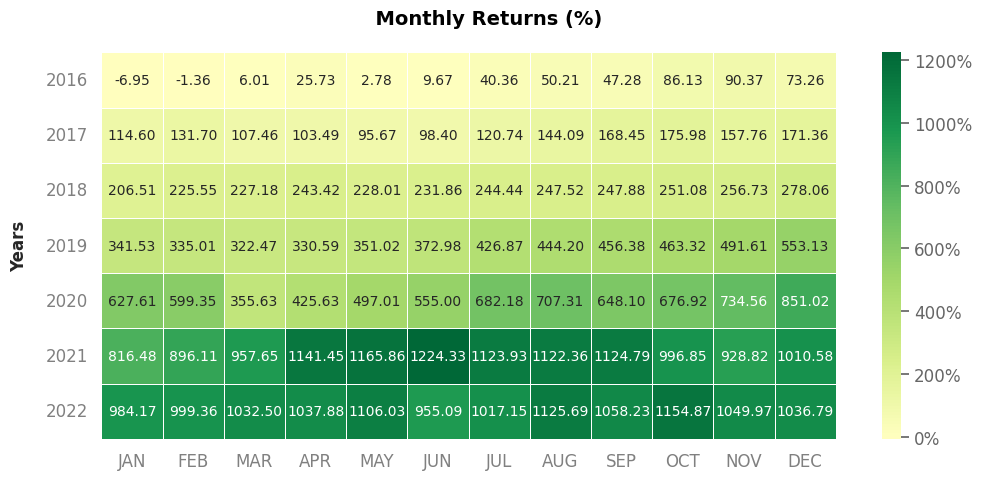

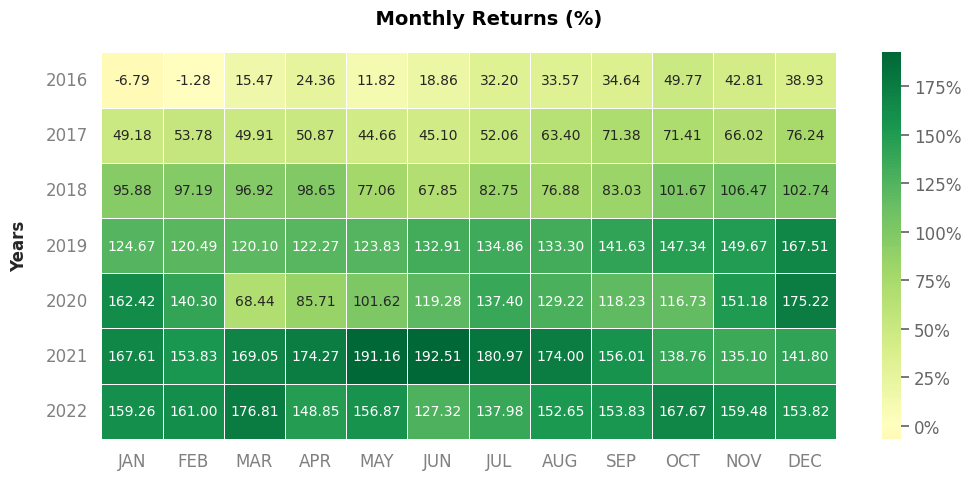

In [78]:
retorno_acum_modelo = (1+retorno_modelo).cumprod()-1
retorno_acum_ibov = (1+retornos_ibovespa).cumprod()-1

retorno_acum_modelo.plot_monthly_heatmap()
retorno_acum_ibov.plot_monthly_heatmap()

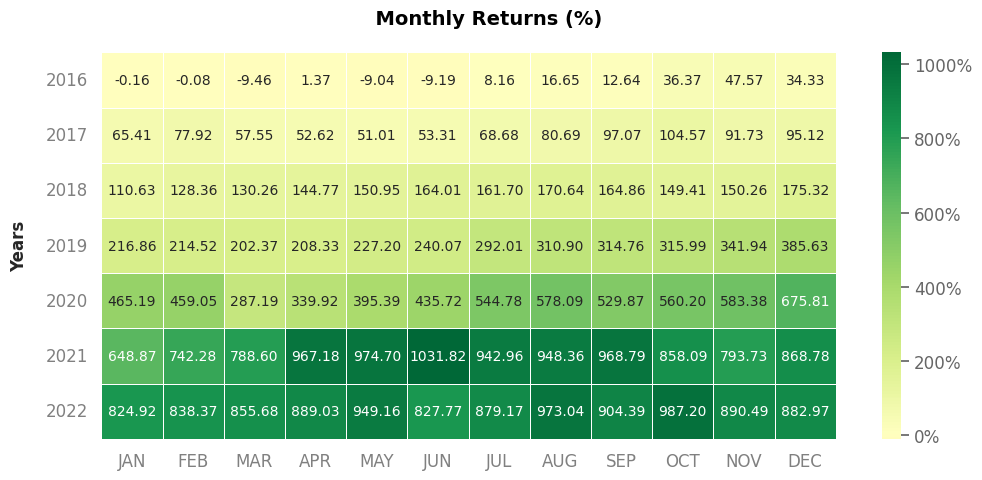

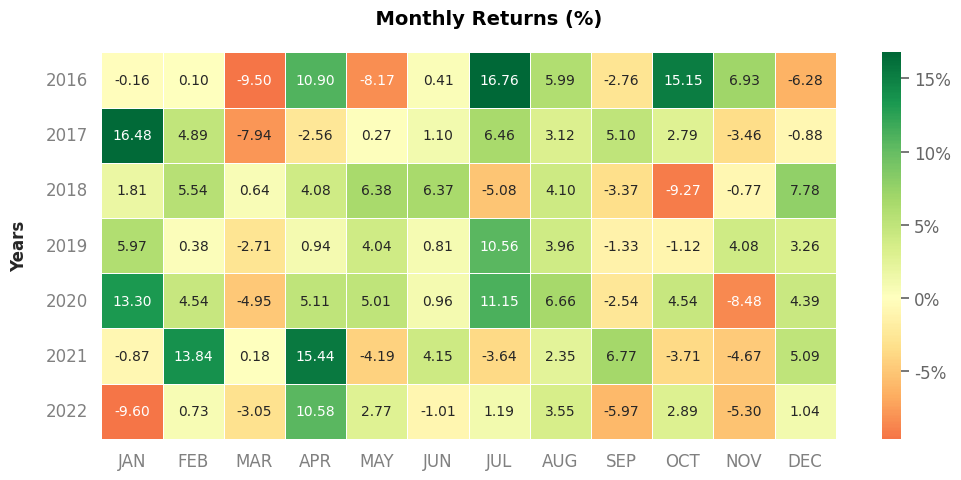

In [85]:
performace_do_modelo_x_ibov = retorno_acum_modelo - retorno_acum_ibov

performace_do_modelo_x_ibov_mes = retorno_modelo - retornos_ibovespa

performace_do_modelo_x_ibov.plot_monthly_heatmap() # performace acumulada do modelo criado frente ao Ibov

performace_do_modelo_x_ibov_mes.plot_monthly_heatmap() # performace més a ës do ibov x modelo